In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [4]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Use Pandas to read the CSV file directly from the URL
df = pd.read_csv(URL)

# Now you have the data in the 'df' DataFrame
print('Data downloaded and read into a DataFrame!')


Data downloaded and read into a DataFrame!


In [5]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [6]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

### *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year

In [7]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
df_line

Year
1980     678.950000
1981     633.408333
1982     631.150000
1983    2889.350000
1984    2972.250000
1985    3176.133333
1986    2341.133333
1987    2288.166667
1988    3074.500000
1989    3247.608333
1990     917.275000
1991     655.891667
1992    1647.700000
1993    2023.250000
1994    2554.825000
1995    4300.250000
1996    2295.208333
1997    2790.241667
1998    2994.891667
1999    2562.683333
2000    1286.791667
2001     692.133333
2002    1783.216667
2003    2628.991667
2004    3148.883333
2005    3076.566667
2006    2557.650000
2007    2727.166667
2008    1289.550000
2009     631.691667
2010    2308.600000
2011    3326.300000
2012    2782.216667
2013    2480.583333
2014    3362.908333
2015    3352.233333
2016    2805.803333
2017    2525.816667
2018    3180.608333
2019    2793.733333
2020    2355.166667
2021    3116.041667
2022    2044.141667
2023    2587.933333
Name: Automobile_Sales, dtype: float64

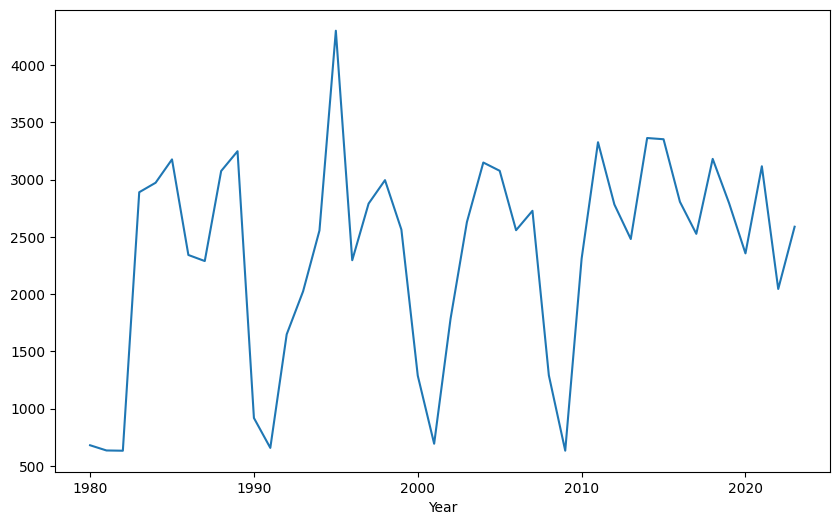

In [8]:
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.show()

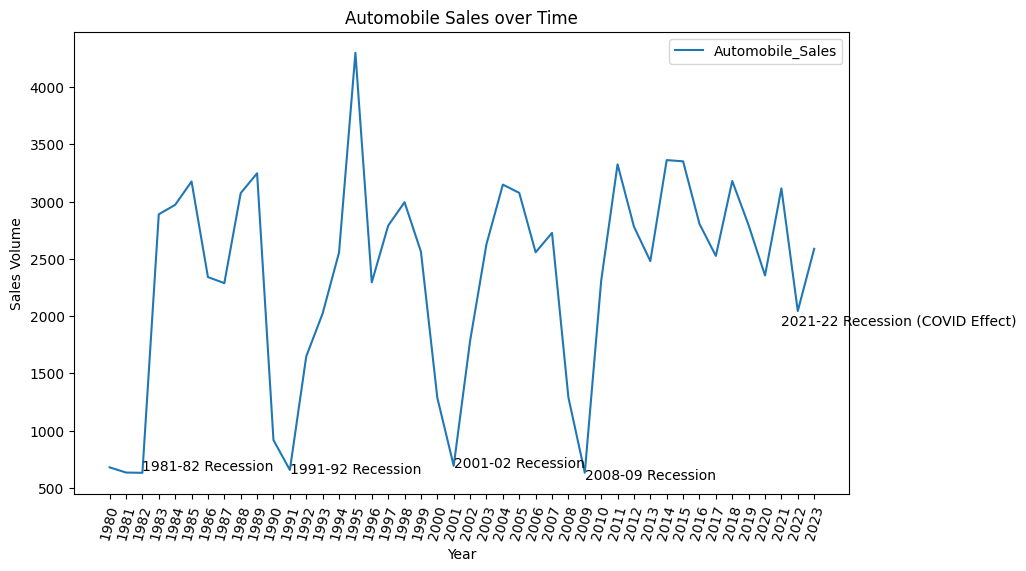

In [9]:
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales over Time')
plt.text(1982, 650, '1981-82 Recession')
plt.text(2009, 575, '2008-09 Recession')
plt.text(2001, 675, '2001-02 Recession')
plt.text(1991, 625, '1991-92 Recession')
plt.text(2021, 1925, '2021-22 Recession (COVID Effect)')
plt.legend()
plt.show()

### Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

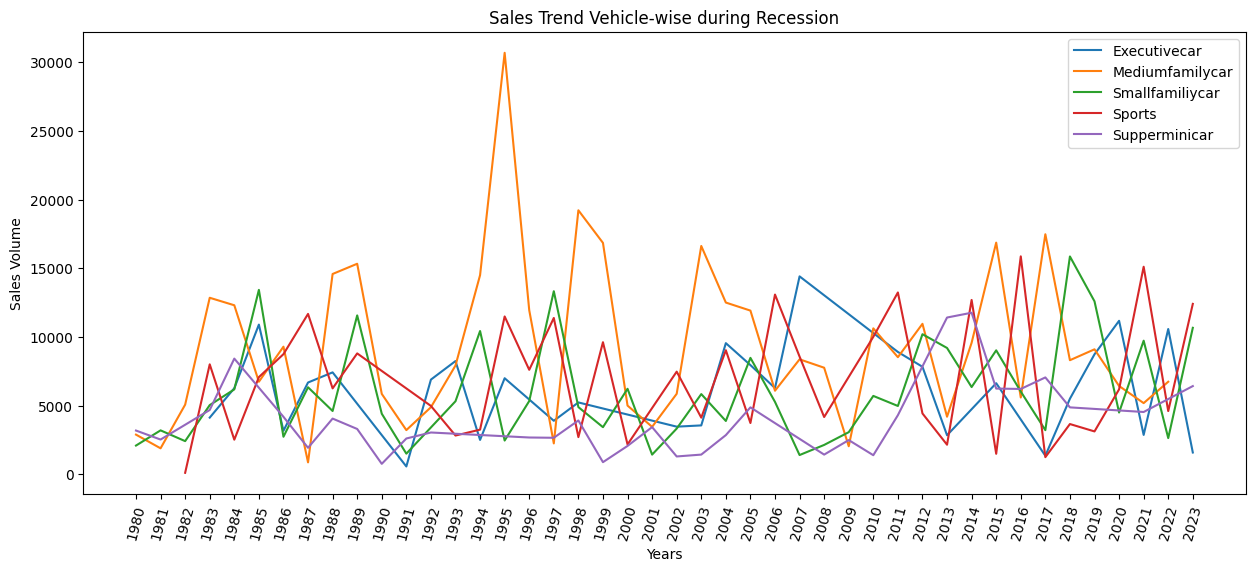

In [10]:
plt.figure(figsize=(15,6))
df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Years')
plt.ylabel('Sales Volume')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

### Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

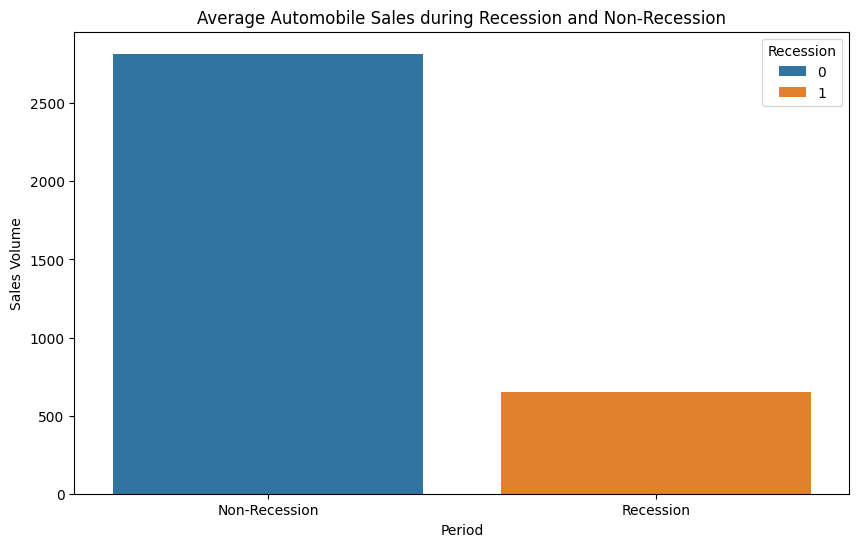

In [11]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('Period')
plt.ylabel('Sales Volume')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

### Now you want to compare the sales of different vehicle types during a recession and a non-recession period

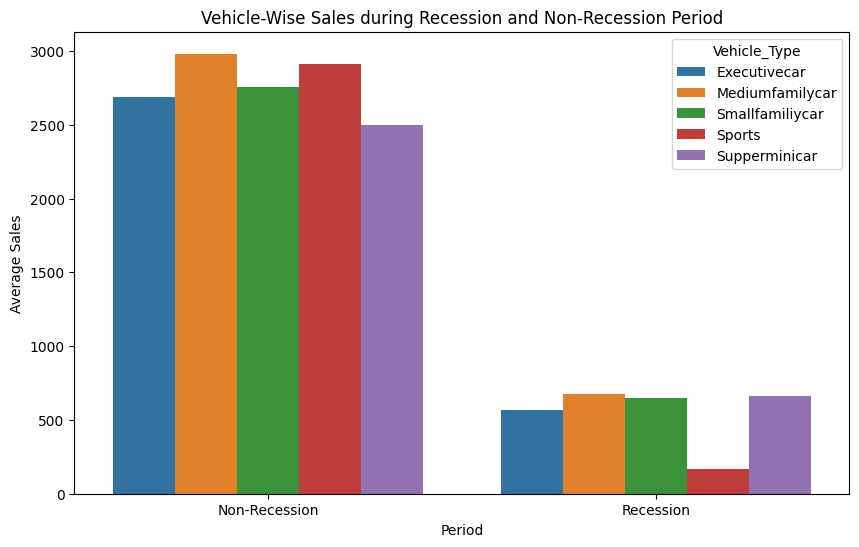

In [12]:
rec_data = df[df['Recession'] == 1]
dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
# Calculate the total sales volume by vehicle type during recessions
#sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.show()

### Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

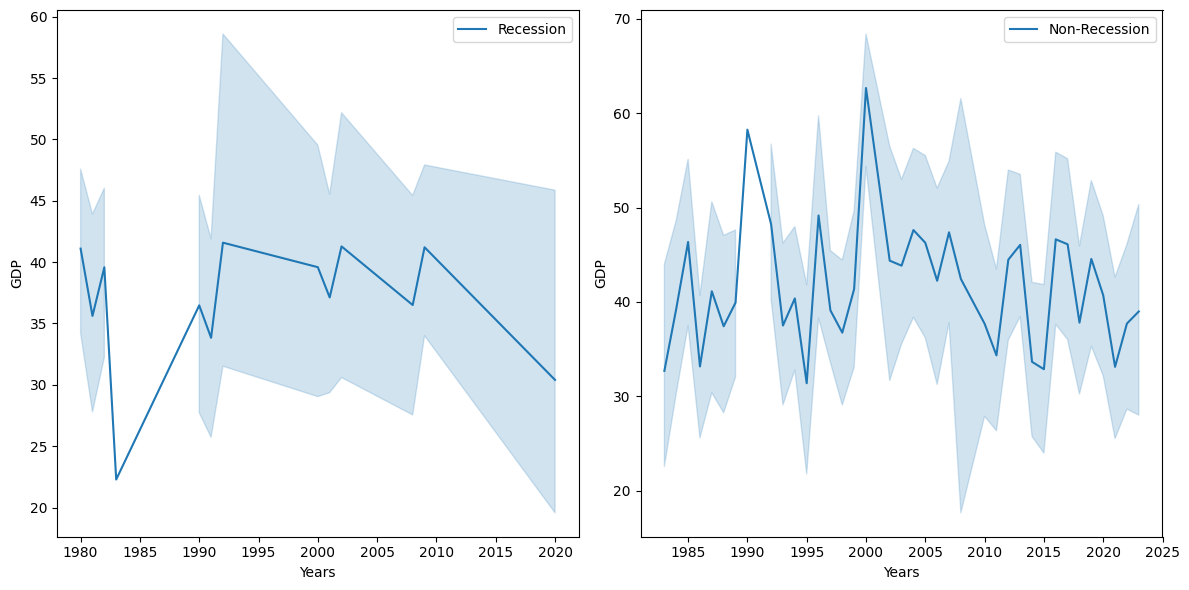

In [13]:
plt.figure(figsize=(12, 6))
non_rec_data = df[df['Recession'] == 0]
#subplot 1
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession')
plt.xlabel('Years')
plt.ylabel('GDP')
plt.legend()
#subplot 1
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession')
plt.xlabel('Years')
plt.ylabel('GDP')
plt.legend()    
plt.tight_layout()
plt.show()

### Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

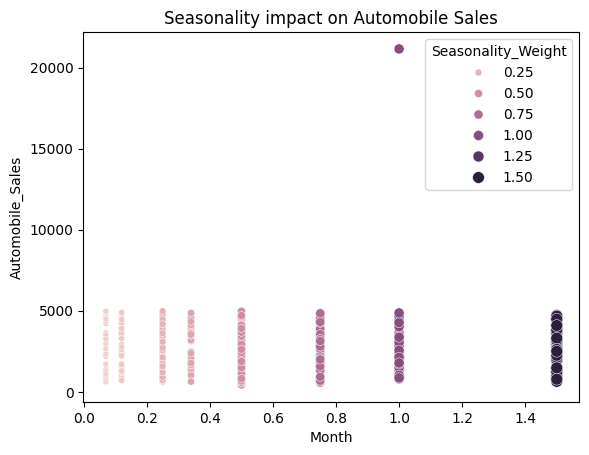

In [14]:
size=non_rec_data['Seasonality_Weight'] #for bubble effect
sns.scatterplot(data=non_rec_data, x='Seasonality_Weight', y='Automobile_Sales', size=size, hue='Seasonality_Weight')
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')
plt.show()

### Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

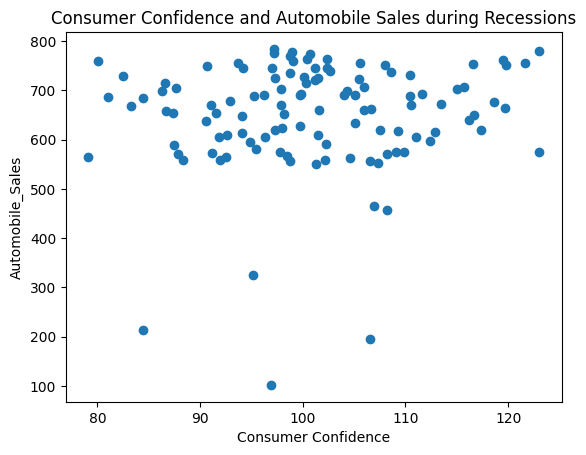

In [15]:
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile_Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

### How does the average vehicle price relate to the sales volume during recessions?

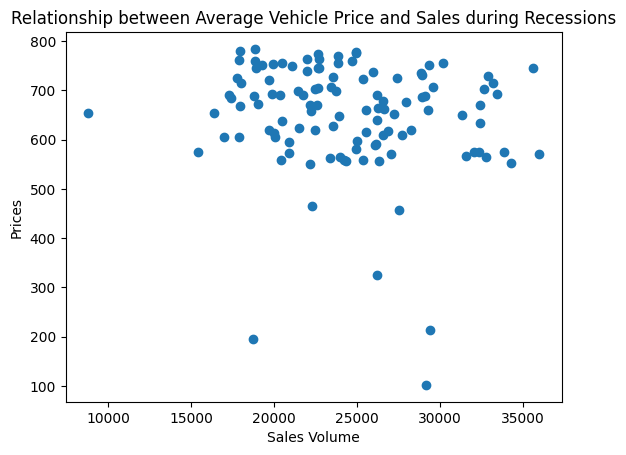

In [16]:
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
plt.xlabel('Sales Volume')
plt.ylabel('Prices')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

### Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

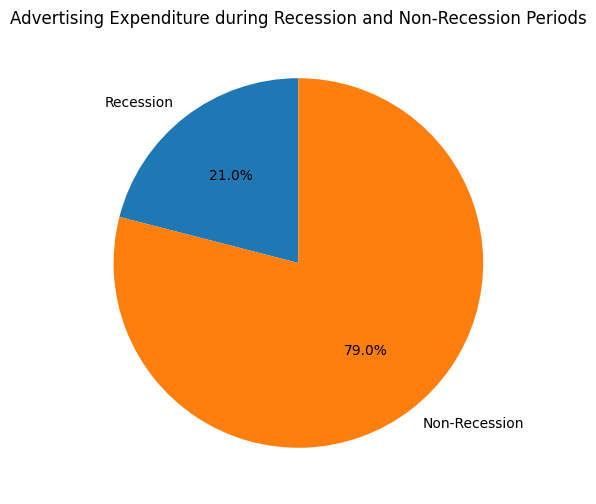

In [49]:
RAtotal = rec_data['Advertising_Expenditure'].sum()
NRtotal = non_rec_data['Advertising_Expenditure'].sum()
plt.figure(figsize=(8, 6))
labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.show()

#### Create another pie plot to display the total advertisement expenditure for each vehicle type


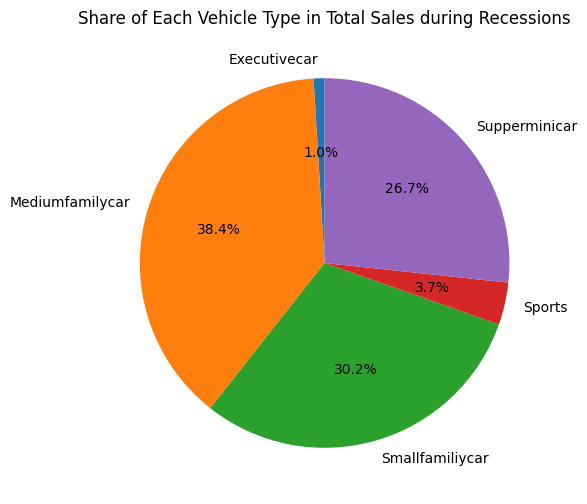

In [50]:
VTsales = rec_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
plt.figure(figsize=(8, 6))
sizes = VTsales.values
labels = VTsales.index
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Share of Each Vehicle Type in Total Sales during Recessions')
plt.show()

### Develop a countplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

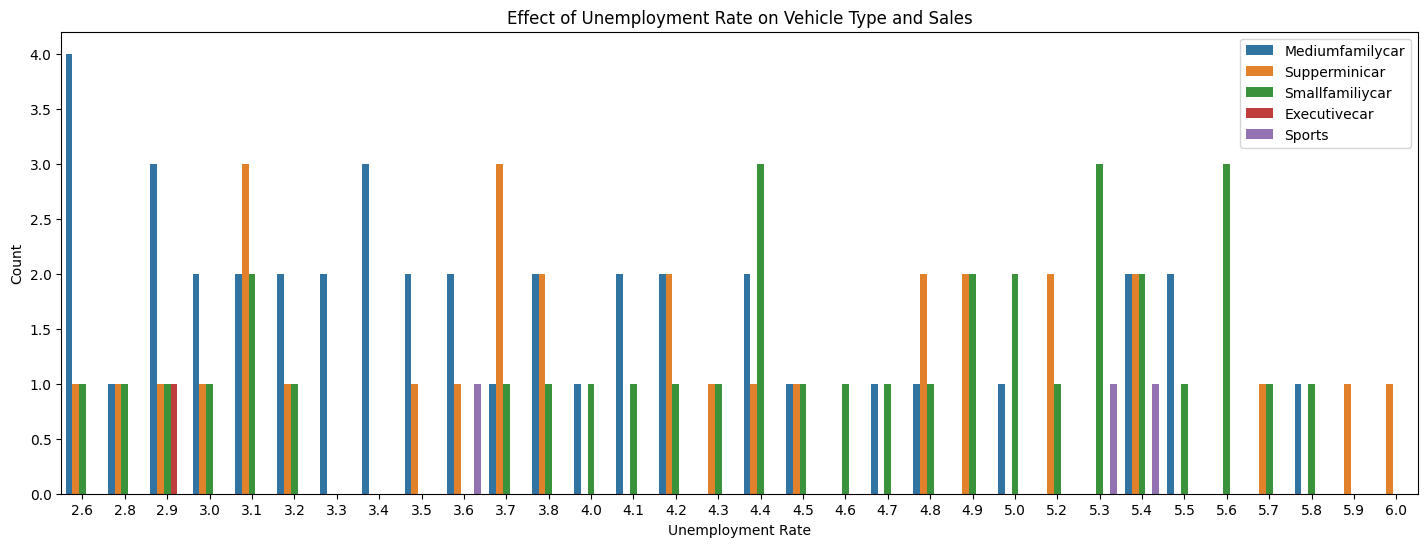

In [60]:
plt.figure(figsize=(17.5, 6))
sns.countplot(data=rec_data, x='unemployment_rate', hue='Vehicle_Type')
plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc='upper right')
plt.show()